In [1]:
#import the libraries that we need, NumPy for mathematical operations and 
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so
import scipy.stats as ss
import pandas as pd


In [9]:
#Create a variable corresponding to the file name. This file must be uploaded to Google Colab. If working offline, this file must be in the same directory as the .py file. 
infile = "Day3CountryInfo2018.csv"

#Create empty lists to store our data
country_list = []
medal_list = []
lat_list = []
long_list = []
gdp_list = []
pop_list = []


#These lines open "infile", which we have assigned to our desired file name. 
#The "r" means we want to read this file.  
#This information is all saved as the variable "csv_file"
with open (infile, 'r') as csv_file:
 
    #The first line of the csv file is not important information for us, it's just the headers
    #The following command processes that first line so when we loop over the rest it's not included
    header = csv_file.readline()

    #This for loop loops over all of the lines in "csv_file" which we assigned all of the data in the file to
    for line in csv_file:
        
        #The split function will split up lines based on whatever you designate.
        #Here we are designating to split each line at the commas, creating three variables 
        country_info = line.split(",")

        #Add the country name to the country list
        country_list.append(country_info[0])
        
        #For each country, we want to tally up the total number of medals, so we create a variable for the tally
        medal_total = 0
        
        #The number of gold, silver and bronze medal are variables 1, 2, and 3 in the "country_info" list
        #This loops over each of those
        for i in country_info[1:4]:
            #This line adds the number of gold silver or bronze medals to the medal total
            medal_total += int(i)

        medal_list.append(medal_total)
        lat_list.append(float(country_info[4]))
        long_list.append(float(country_info[5]))
        gdp_list.append(float(country_info[6]))
        pop_list.append(float(country_info[7]))


#To calculate the gpd per capita per (per 5000 pop.) we have to divide the values from the gpd and population lists and multiply by 5000
#Turning lists into arrays can make math much faster. Here for "gdp_per_capita" we calculated it in one line.
gdp_per_capita = np.array(gdp_list)/np.array(pop_list)*5000


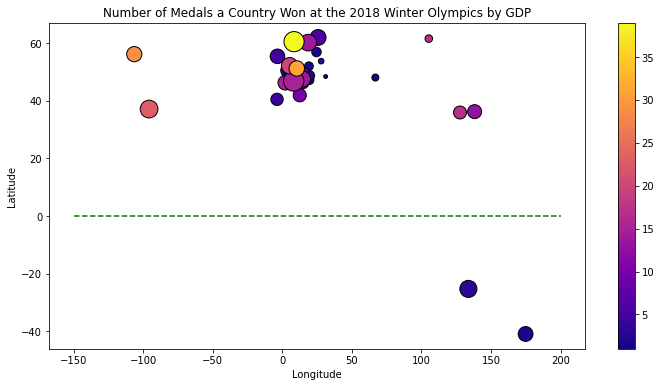

In [10]:
#This line create a new figure and simply sets its dimensions to be a bit larger so it's easier to read
plt.figure(figsize=(12,6))
#You can change the size and color of the scatter points to describe other variables. 
#Here we set the color "c" to correspond with the number of medals won and the size "s" to the gdp per capita
plt.scatter(long_list, lat_list, c=medal_list, s=gdp_per_capita, cmap='plasma',edgecolors='black')
plt.hlines((0),-150,200,linestyles='dashed',color='g')
plt.title("Number of Medals a Country Won at the 2018 Winter Olympics by GDP")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar()
plt.savefig('Day_2_HW.png')

In [12]:
#In order to determine which factor is most correlated with Olympic success, we should run a linear regression
#To graph this, we have to define a linear equation

def fit_eq(x, m, b):
    return m*x + b

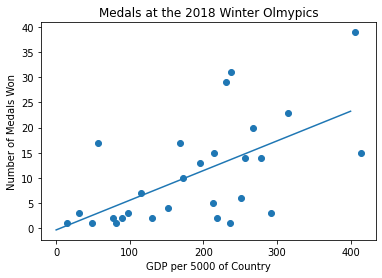

R^2: 0.362796494593953


In [13]:
#This scipy.stats function takes in a list of x variables and a list of y varibles, then computes a linear grepession
#Output of the function is: slope, y-intercept, r value (correlation), p value, and the standard error
gdp_slope, gdp_intercept, gdp_r_value, gdp_p_value, gdp_std_err = ss.linregress(gdp_per_capita, medal_list)

#To plot the line, we need a series of x variables. For linspace, you enter the minimum value (0), 
#the maximum value (400) and the number of points you want evenly spaced (100, this number doesn't really matter for our case)
xvals = np.linspace(0, 400, 100)
#to get yvalues to plot for our line, plug the values into our fit function (fit_eq) and plug in the slope and intercept calcuated from ss.linregress
yvals = fit_eq(xvals, gdp_slope, gdp_intercept)
#plot the raw data ploints as a scatter plot
plt.scatter(np.abs(gdp_per_capita), medal_list)
#plot the generatede x and yvals for the line
plt.plot(xvals, yvals)
plt.title('Medals at the 2018 Winter Olmypics')
plt.xlabel('GDP per 5000 of Country')
plt.ylabel('Number of Medals Won')
plt.show()
#calculate the R squared value
r_squared = gdp_r_value**2
#print() can only take in string variables, so we turn r_squared into a string with the str() function
print('R^2: ' + str(r_squared))

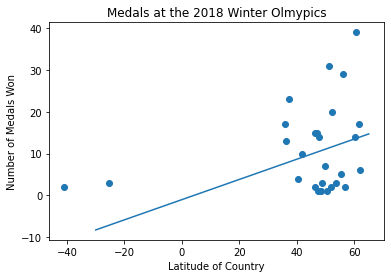

R^2: 0.04087455147931968


In [14]:
#This is the same as the previous cell except it uses the latitude data
lat_slope, lat_intercept, lat_r_value, lat_p_value, lat_std_err = ss.linregress(np.abs(lat_list), medal_list)


xvals = np.linspace(-30, 65, 100)
yvals = fit_eq(xvals, lat_slope, lat_intercept)

plt.scatter(lat_list, medal_list)
plt.plot(xvals, yvals)
plt.title('Medals at the 2018 Winter Olmypics')
plt.xlabel('Latitude of Country')
plt.ylabel('Number of Medals Won')
plt.show()
r_squared = lat_r_value**2
print('R^2: ' + str(r_squared))


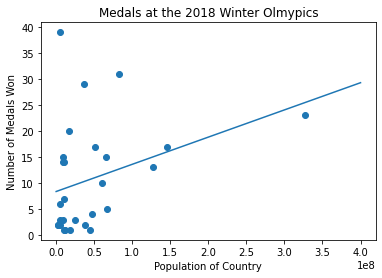

R^2: 0.11295525578389548


In [8]:
#This is the same as the previous cell except it uses the population data
pop_slope, pop_intercept, pop_r_value, pop_p_value, pop_std_err = ss.linregress(pop_list, medal_list)

xvals = np.linspace(0, 4e8, 100)
yvals = fit_eq(xvals, pop_slope, pop_intercept)
plt.scatter(pop_list, medal_list)
plt.plot(xvals, yvals)
plt.title('Medals at the 2018 Winter Olmypics')
plt.xlabel('Population of Country')
plt.ylabel('Number of Medals Won')
plt.show()
r_squared = pop_r_value**2
print('R^2: ' + str(r_squared))

As we can see here, GDP per capita seems to be the most influential factor that determines a country's success at the Winter Olympics. Congrats! This is the end of the basic homework assignments. Now, see if you can create a multivariable regression with all three variables using LinearRegession() from sklearn and create a model to predict success for countries in 2014. Tips and instructions are on the "Advaned" Day 3 Homework.